For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1) Has the network latency gone up since we switched internet service providers?


* H0: There has been no chance in latency since we switched internet providers.
* Ha: There has been in increase in latency since we switched interet providers.
* True Negative: After looking at the data, we have deteremined that our latency has not changed.
* True Positive: The new ISP has impacted latency.
* Type 1: We have observed a change in latency; however, there has not been a change in latency.
* Type 2: We have observed no change in latency; however, there has been an impact to latency.

2) Is the website redesign any good?

* H0: There been no change in user retention since the website redesign.
* Ha: There has been a decrease in user churn since the website redesign.
* True Negative: After looking at the data, we have deteremined that the redesign has not impacted customer retention.
* True Positive: The new redesign has impacted customer retention.
* Type 1: We have observed a change in customer retention; however there has not actually been a change in customer retention .
* Type 2: We have observed no change in customer retention; however, there has been a change in customer retention.

3) Is our television ad driving more sales?


* H0: There has been no change in sales since we started having television ads.
* Ha: There has been an increase in sale since we started having television ads.
* True Negative: After looking at the data, we have deteremined that sales have remained steady.
* True Positive: Since launching the television ad campagin sales have been impacted.
* Type 1: We have observed a change in sales; however, this was not caused by the ads.
* Type 2: We have observed no change in sales; however, there was a change in sales.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt
import seaborn as sns
print("Success!!") 

Success!!


# T-Test

## Load the mpg dataset and use it to answer the following questions using 


### * Do manual cars get better gas mileage than automatic cars?

In [2]:
from pydataset import data
mpg = data('mpg') 
mpg['avg_miles'] = (mpg['hwy'] + mpg['cty'])/2
mpg['is_auto'] = mpg['trans'].str.contains('auto')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles,is_auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True


### * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

(117,)
(117,)
24.097480106100797
27.122605363984682
T = -0.21960177245940962, p/2= 0.4131875386030319
is p/2 < alpha?  False
is t > 0?  False
We fail to reject $H_{0}$


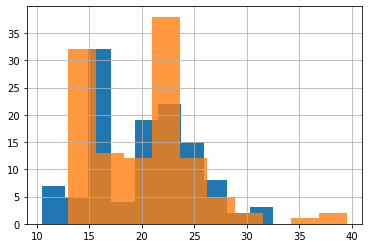

In [3]:
# H0:  Mean of avg_miles for 08 cars = Mean of avg_miles for 99 cars
mpg_08 = mpg.loc[mpg['year'] == 2008]
mpg_99 = mpg.loc[mpg['year'] == 1999]
alpha = .05
mpg_08['avg_miles'].hist()
mpg_99['avg_miles'].hist(alpha=.8)
# of Observations
print(mpg_08.avg_miles.shape)
print(mpg_99.avg_miles.shape)
# Variance (2 Sample T-Test)
print(mpg_08.avg_miles.var())
print(mpg_99.avg_miles.var())
t, p = stats.ttest_ind(mpg_08.avg_miles, mpg_99.avg_miles, equal_var = False)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

### * Are compact cars more fuel-efficient than the average car?


(47,)
(234,)
12.442876965772433
25.50542900113715
T = 6.646345489688162, p/2= 1.1788969801892359e-09
is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


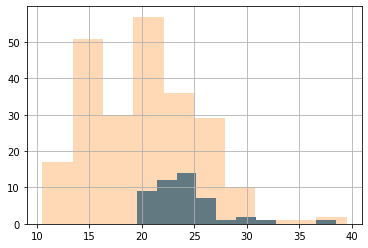

In [4]:
compact = mpg.loc[mpg['class'] == 'compact']
alpha = .05

compact['avg_miles'].hist()
mpg['avg_miles'].hist(alpha=.3)
# of Observations
print(compact.avg_miles.shape)
print(mpg.avg_miles.shape)
# Variance (2 Sample T-Test)
print(compact.avg_miles.var())
print(mpg.avg_miles.var())
t, p = stats.ttest_ind(compact.avg_miles, mpg.avg_miles, equal_var = False)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

### * Do manual cars get better gas mileage than automatic cars?

(157,)
(77,)
21.942777233382337
26.635167464114826
T = 4.443514012903071, p/2= 8.976124499958965e-06
is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


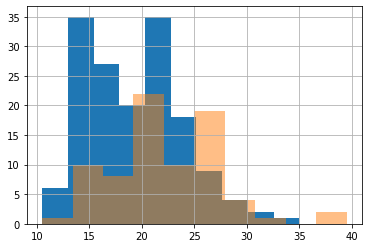

In [5]:
auto = mpg.loc[mpg['is_auto'] == True]
manual = mpg.loc[mpg['is_auto'] == False]
alpha = .05
auto['avg_miles'].hist()
manual['avg_miles'].hist(alpha=.5)
# of Observations
print(auto.avg_miles.shape)
print(manual.avg_miles.shape)
# Variance (2 Sample T-Test)
print(auto.avg_miles.var())
print(manual.avg_miles.var())
t, p = stats.ttest_ind(manual.avg_miles, auto.avg_miles, equal_var = False)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

# Correlation

## Using the telco_churn answering the following questions

In [6]:
telco = pd.read_csv("C:/Users/anthony/Documents/Data_Science/CodeUpProject1/telco.csv")
telco['total_charges'].fillna(0, inplace = True)
telco['number_of_months'].fillna(0, inplace = True)
telco

,Unnamed: 0,customer_id,churn,gender,is_senior_citizen,partner,dependents,phone_service,phone_type,internet_service,internet_type,contract,contract_type,payment_type,monthly_charges,total_charges,number_of_months,bundle,number_of_years
0,0,0002-ORFBO,No,Female,0,Yes,Yes,1,One Line,1,DSL,1,1 Year,Mailed check,65.60,593.30,9.0,"One Line, DSL",0.750000
1,1,0003-MKNFE,No,Male,0,No,No,2,Two or More Lines,1,DSL,0,Month-to-Month,Mailed check,59.90,542.40,9.0,"Two or More Lines, DSL",0.750000
2,2,0004-TLHLJ,Yes,Male,0,No,No,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,73.90,280.85,4.0,"One Line, Fiber Optic",0.333333
3,3,0011-IGKFF,Yes,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,98.00,1237.85,13.0,"One Line, Fiber Optic",1.083333
4,4,0013-EXCHZ,Yes,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,Month-to-Month,Mailed check,83.90,267.40,3.0,"One Line, Fiber Optic",0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,7044,9987-LUTYD,No,Female,0,No,No,1,One Line,1,DSL,1,1 Year,Mailed check,55.15,742.90,13.0,"One Line, DSL",1.083333
7045,7045,9992-RRAMN,Yes,Male,0,Yes,No,2,Two or More Lines,2,Fiber Optic,0,Month-to-Month,Electronic check,85.10,1873.70,22.0,"Two or More Lines, Fiber Optic",1.833333
7046,7046,9992-UJOEL,No,Male,0,No,No,1,One Line,1,DSL,0,Month-to-Month,Mailed check,50.30,92.75,2.0,"One Line, DSL",0.166667
7047,7047,9993-LHIEB,No,Male,0,Yes,Yes,1,One Line,1,DSL,2,2 Year,Mailed check,67.85,4627.65,68.0,"One Line, DSL",5.666667


### Does tenure correlate with monthly charges? 

0.24731547593455375 1.0048938366802045e-98
We reject H0


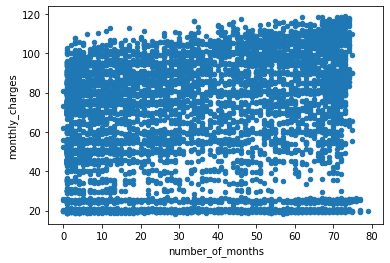

In [7]:
alpha = .05
corr, p = stats.pearsonr(telco['number_of_months'], telco['monthly_charges'])
print(corr, p)
if p < alpha:
    print('We reject H0')
else:
    print("We fail to reject H0")
    
telco.plot.scatter('number_of_months', 'monthly_charges')

## Total charges?

0.8262177774883576 0.0
Reject H0


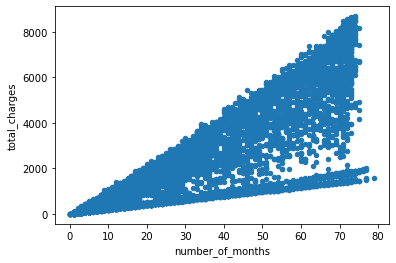

In [8]:
alpha = .05
corr, p = stats.pearsonr(telco['number_of_months'], telco['total_charges'])
print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

telco.plot.scatter('number_of_months', 'total_charges')

## What happens if you control for phone and internet service?

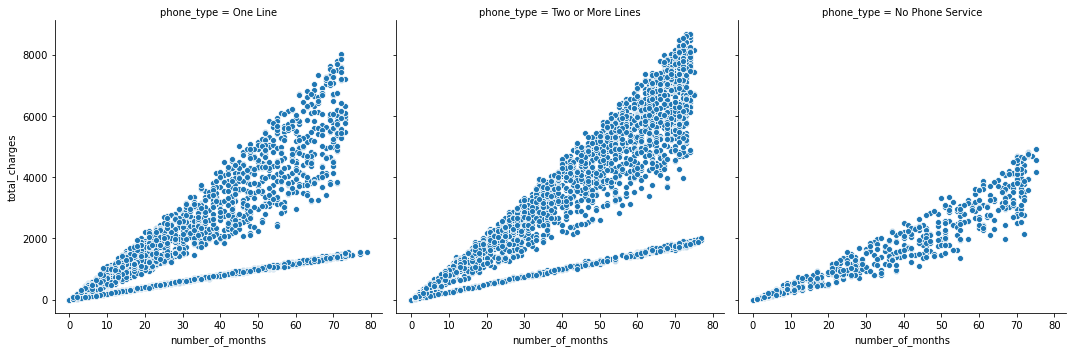

In [9]:
sns.relplot(data=telco, y='total_charges', x='number_of_months', col='phone_type')

In [10]:
one_line = telco[telco.phone_type == 'One Line']
twoplus_line = telco[telco.phone_type == 'Two or More Lines']
no_line =  telco[telco.phone_type == 'No Phone Service']

r, p = stats.pearsonr(one_line['number_of_months'], one_line['total_charges'])
print('one_line')
print('  r =', r)
print('  p =', p)

r, p = stats.pearsonr(twoplus_line.number_of_months, twoplus_line.total_charges)
print('twoplus_line')
print('  r =', r)
print('  p =', p)

r, p = stats.pearsonr(no_line.number_of_months, no_line.total_charges)
print('no_line')
print('  r =', r)
print('  p =', p)

print('We will reject the H0')

one_line
  r = 0.772392534111371
  p = 0.0
twoplus_line
  r = 0.8425452573765024
  p = 0.0
no_line
  r = 0.9543558863259287
  p = 0.0
We will reject the H0


# Using the employees database answer the following questions

In [11]:
# Create a function named get_db_url. It should accept a username, hostname, password, and database nam
from env import host, user, password
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
q1 = pd.read_sql("""Select employees.emp_no, hire_date, salary, to_date FROM employees.employees
left join employees.salaries
on employees.employees.emp_no = employees.salaries.emp_no
where employees.salaries.to_date > CURDATE() 
""", get_db_url('employees'))

q2 = pd.read_sql("""select employees.emp_no, title, hire_date, to_date from employees.employees
join employees.titles
on employees.titles.emp_no = employees.employees.emp_no 
""", get_db_url('employees'))

### Is there a relationship between how long an employee has been with the company and their salary?

In [12]:
q1.dtypes

emp_no        int64
hire_date    object
salary        int64
to_date      object
dtype: object

0.30646256131860894 0.0
Reject H0


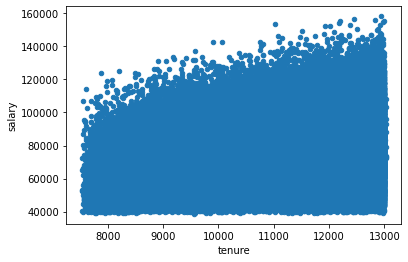

In [15]:
q1['tenure'] = (pd.to_datetime("today") - pd.to_datetime(q1['hire_date']))
q1['tenure'] = q1['tenure'].astype(str).str.split().str[0].astype(int)

alpha = .05
corr, p = stats.pearsonr(q1['tenure'], q1['salary'])
print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")
    
q1.plot.scatter('tenure', 'salary')

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

0.27711427979132297 0.0
Reject H0


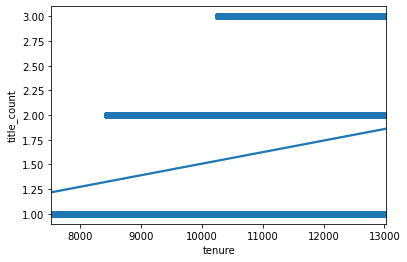

In [16]:
q2['tenure'] = (pd.to_datetime("today") - pd.to_datetime(q2['hire_date']))
q2['tenure'] = q2['tenure'].astype(str).str.split().str[0].astype(int)
qmerge = q2.groupby('emp_no')[['title']].count()
qmerge.reset_index(inplace = True)
qmerge.rename(columns={'title':'title_count'}, inplace = True)
q2final = q2.merge(qmerge, left_on='emp_no', right_on='emp_no')

alpha = .05
corr, p = stats.pearsonr(q2final['tenure'], q2final['title_count'])
print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")


sns.regplot(x='tenure', y='title_count', data=q2final)

# Use the sleepstudy data. Is there a relationship between days and reaction time?

0.5352302262650253 9.894096322214812e-15
Reject H0


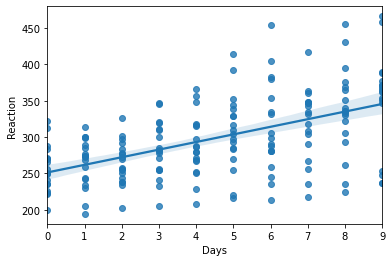

In [17]:
sleep = data('sleepstudy')
corr, p = stats.pearsonr(sleep['Days'], sleep['Reaction'])
print(corr, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

sns.regplot(x='Days', y='Reaction', data=sleep)

# Chi Squared

### Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|   |   |   |   |   |
|---|---|---|---|---|
|   | CodeUp  |  Not Codeup |
| Uses  |  49 | 20  |   |   
| Doesn't Use |  1 | 30  |  

In [18]:
index = ['Uses', "Doesn't Use"]
columns = ['CodeUp', 'Not Codeup']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

36.65264142122487 1.4116760526193828e-09
Reject H0


### Choose another 2 categorical variables from the mpg dataset and perform a chisquared contingency table test with them. Be sure to state your null and alternative hypotheses.

In [19]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
avg_miles       float64
is_auto            bool
dtype: object

In [20]:
# H0: There is no relationship beteween transmission and class type
# Ha: There is a relationship between transmission and class type

observed = pd.crosstab(mpg.trans, mpg['class'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

126.38654482049157 9.774228558920502e-08
Reject H0


### Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [21]:
gen = pd.read_sql("""select employees.emp_no, gender, dept_name from employees.employees
join employees.dept_emp
on employees.employees.emp_no = employees.dept_emp.emp_no 
join employees.departments
on employees.departments.dept_no = employees.dept_emp.dept_no
""", get_db_url('employees'))
gen.head()

,emp_no,gender,dept_name
0,10011,F,Customer Service
1,10038,M,Customer Service
2,10049,F,Customer Service
3,10060,M,Customer Service
4,10088,F,Customer Service


In [22]:
gen['maketing_or_sales'] = (gen['dept_name'] == 'Sales') | (gen['dept_name'] == 'Marketing')
observed = pd.crosstab(gen.gender, gen.maketing_or_sales)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

0.9784497893664333 0.3225818280899888
Fail to reject H0


Is an employee's gender independent of whether or not they are or have been a manager?

In [23]:
gen_manager = pd.read_sql("""select employees.emp_no, gender,
case when dept_no is not null then "True" else "False" end as "manager"
from employees.employees
left join employees.dept_manager
on  employees.dept_manager.emp_no = employees.employees.emp_no
""", get_db_url('employees'))

observed = pd.crosstab(gen_manager.gender, gen_manager.manager)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

1.4566857643547197 0.22745818732810363
Fail to reject H0
